In [175]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'time')

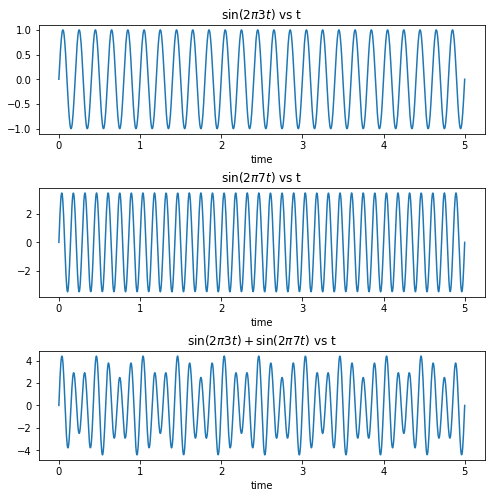

In [176]:
# numero de pontos no gráfico
amostra = 1024

# tempo final, inicial e vetor de tempo
t_i = 0
t_f = 5
t = np.linspace(t_i,t_f,amostra)

# as amostras
amostra_1 = 1.*np.sin(2*np.pi*5*t)
amostra_2 = 3.5*np.sin(2*np.pi*7*t)

# montando os gráficos
figure, axis = plt.subplots(nrows=3,ncols=1,figsize=(8,8))
plt.subplots_adjust(wspace=.2,hspace=.5)
axis[0].set_xlabel('time')
axis[0].set_title('$\sin(2\pi 3t)$ vs t')
axis[0].plot(t,amostra_1)


axis[1].plot(t,amostra_2)
axis[1].set_title('$\sin(2\pi 7t)$ vs t')
axis[1].set_xlabel('time')

axis[2].plot(t,amostra_1+amostra_2)
axis[2].set_title('$\sin(2\pi 3t)+\sin(2\pi 7t)$ vs t')
axis[2].set_xlabel('time')

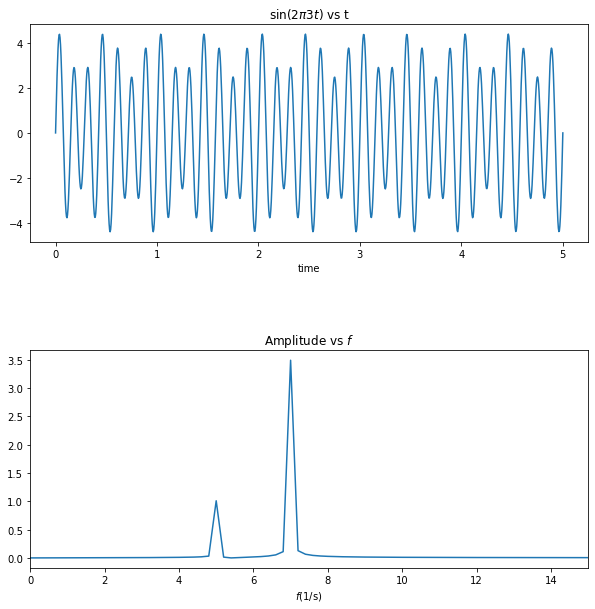

In [177]:
#%matplotlib
ft = 2.*np.abs(np.fft.fft(amostra_1+amostra_2))/amostra
freq = np.fft.fftfreq(amostra,(t_f-t_i)/amostra)
marcador = freq>=0

n_ft = ft[marcador]
n_freq = freq[marcador]

figure2,axis2 = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
plt.subplots_adjust(wspace=.2,hspace=.5)

axis2[0].set_title('$\sin(2\pi 3t)$ vs t')
axis2[0].plot(t,amostra_1+amostra_2)
axis2[0].set_xlabel('time')


axis2[1].set_title('Amplitude vs $f$')
axis2[1].set_xlabel('$f$(1/s)')
axis2[1].set_xlim(0,15)
axis2[1].plot(n_freq,n_ft)


VAmos agora definir a função degrau e então ver o espectro da mesma

In [129]:
def pulse(time):
    f = np.zeros(len(time))
    for i,t in zip(range(len(time)),time):
        if t>-1 and t<1:
            f[i]=1
    return f

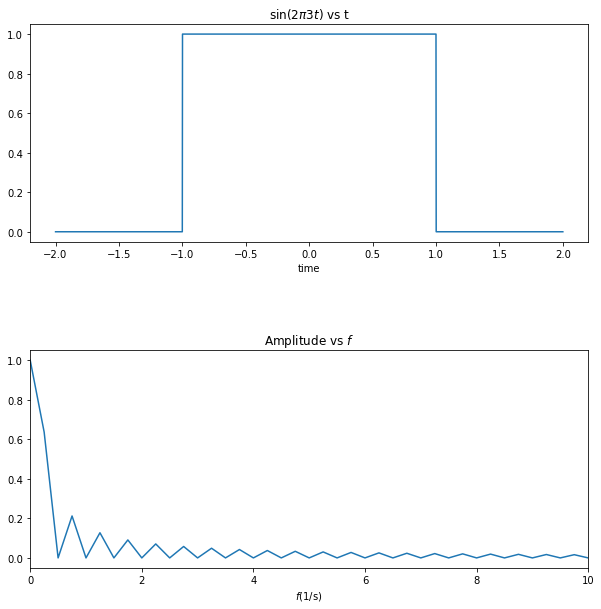

In [178]:
#%matplotlib

sample = 5000
ti = -2
tf = 2
t1 = np.linspace(ti,tf,sample)

ft0 = 2.*np.fft.fft(pulse(t1))/sample
ft1 = 2.*np.abs(np.fft.fft(pulse(t1)))/sample
freq1 = np.fft.fftfreq(sample,(tf-ti)/sample)

n_ft0 = ft0[freq1>=0]
n_ft1 = ft1[freq1>=0]
n_freq1 = freq1[freq1>=0]

figure3,axis3 = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
plt.subplots_adjust(wspace=.2,hspace=.5)

axis3[0].set_title('$\sin(2\pi 3t)$ vs t')
axis3[0].plot(t1,pulse(t1))
axis3[0].set_xlabel('time')


axis3[1].set_title('Amplitude vs $f$')
axis3[1].set_xlabel('$f$(1/s)')
axis3[1].set_xlim(0,10)
axis3[1].plot(n_freq1,n_ft1)

In [174]:
time = np.linspace(-2,2,100)
func = np.ones(len(time))
func[0] = n_ft0[0]/2
for b,a in zip(n_freq1[1:10],n_ft1[1:10]):
    func+= np.real(a)*np.cos(2*np.pi*b*time) - np.imag(a)*np.sin(2*np.pi*b*time)

plt.plot(time,func)

<ipython-input-174-bfdefef00732>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  func[0] = n_ft0[0]/2


In [179]:
n_ft[:10]

array([1.01459639e-15, 2.72548595e-04, 5.46806151e-04, 8.24521724e-04,
       1.10752678e-03, 1.39778218e-03, 1.69743285e-03, 2.00887390e-03,
       2.33483345e-03, 2.67847975e-03])